<a href="https://colab.research.google.com/github/Yutong-Lu/Datathon-5/blob/main/Pourya_Datathon5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Yutong-Lu/Datathon-5.git

Cloning into 'Datathon-5'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 14), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (29/29), 665.77 KiB | 2.16 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
cd ./Datathon-5

/content/Datathon-5


In [ ]:
cd ..

/content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import warnings

In [ ]:
# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
df = pd.read_csv(file_path)

df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [ ]:
df.shape

(999999, 14)

In [ ]:
# no missing value
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [ ]:
# Check the number of sequence for each person
df['subject'].value_counts()

subject1    161280
subject2    130561
subject8    129024
subject3    122112
subject5    119808
subject4    116736
subject7    104448
subject6     98304
subject9     17726
Name: subject, dtype: int64

In [ ]:
# Check activity frequency
df['Activity'].value_counts()

0     720946
1      27648
2      25406
3      24576
4      24576
9      24576
10     24576
11     24576
5      24576
7      23809
8      23501
6      22990
12      8243
Name: Activity, dtype: int64

In [ ]:
data_crosstab = pd.crosstab(df['subject'], df['Activity'], margins = False)
print(data_crosstab)

Activity      0     1     2     3     4     5     6     7     8     9     10  \
subject                                                                        
subject1  126106  3072  3072  3072  3072  3072  3072  3072  3379  3072  3072   
subject2   95029  3072  3072  3072  3072  3072  3174  3328  3430  3072  3072   
subject3   86732  3072  3072  3072  3072  3072  3226  3379  3175  3072  3072   
subject4   81408  3072  3072  3072  3072  3072  3328  3277  3123  3072  3072   
subject5   85861  3072  3072  3072  3072  3072  2765  2868  2714  3072  3072   
subject6   66099  3072  3072  3072  3072  3072  2202  2099  2304  3072  3072   
subject7   70195  3072  3072  3072  3072  3072  3072  2765  2816  3072  3072   
subject8   95692  3072  3072  3072  3072  3072  2151  3021  2560  3072  3072   
subject9   13824  3072   830     0     0     0     0     0     0     0     0   

Activity    11    12  
subject               
subject1  3072  1075  
subject2  3072  1024  
subject3  3072  1024  
subj

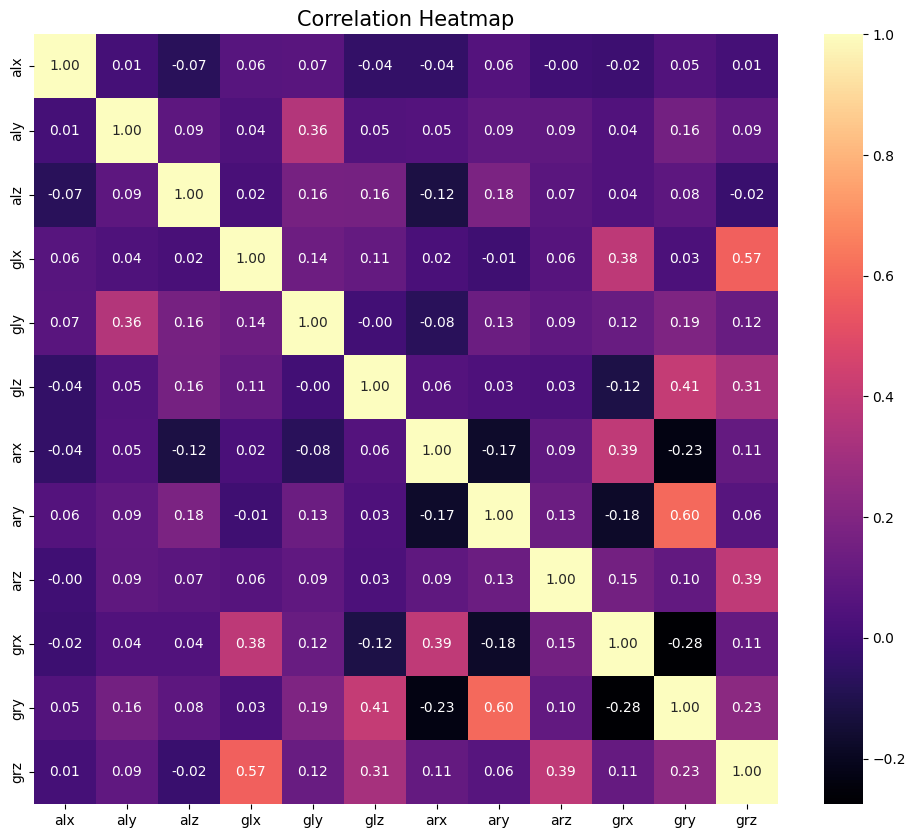

In [ ]:
# For the correlation heatmap, we'll use only numerical columns.

numerical_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col != 'Activity'
]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = df[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

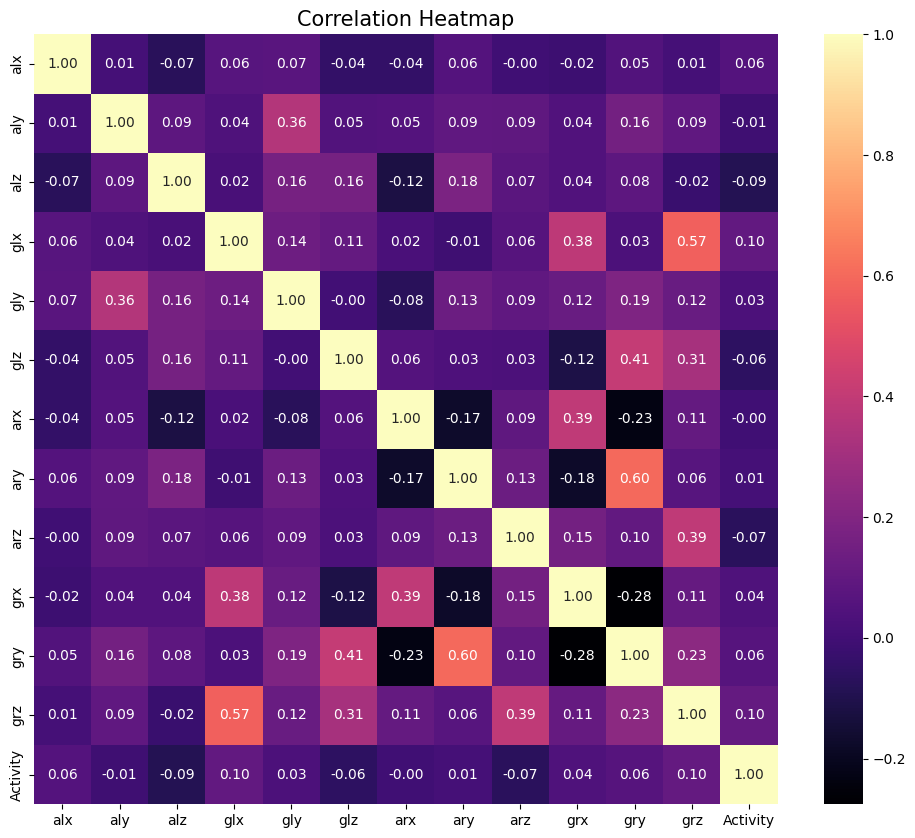

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

In [ ]:
from sklearn.preprocessing import StandardScaler

train_sets = []
test_sets = []
for i in range(len(grouped_dfs)):
    # Splitting the groups into training and test sets with an 80:20 ratio
    train_set, test_set = train_test_split(grouped_dfs[i], test_size=0.2, random_state=42)
    print(np.shape(train_set), np.shape(test_set))
    numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_columns.remove('Activity')  # Assuming 'Activity' is the target variable

    scaler = StandardScaler()
    train_set[numerical_columns] = scaler.fit_transform(train_set[numerical_columns])
    test_set[numerical_columns] = scaler.transform(test_set[numerical_columns])
    train_sets.append(train_set)
    test_sets.append(test_set)

(129024, 14) (32256, 14)
(104448, 14) (26113, 14)
(97689, 14) (24423, 14)
(93388, 14) (23348, 14)
(95846, 14) (23962, 14)
(78643, 14) (19661, 14)
(83558, 14) (20890, 14)
(103219, 14) (25805, 14)
(14180, 14) (3546, 14)


Create sequence for training set

In [ ]:
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[numerical_features].values)
        output.append(label)

    return np.array(sequences), np.array(output)

In [ ]:
# Creating sequences for training and test data
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

for i in range(len(train_sets)):
    X_train, y_train = create_sequences(train_sets[i], sequence_length=100)
    X_test, y_test = create_sequences(test_sets[i], sequence_length=100)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

(1290, 100, 12) (1290,) (322, 100, 12) (322,)
(1044, 100, 12) (1044,) (261, 100, 12) (261,)
(976, 100, 12) (976,) (244, 100, 12) (244,)
(933, 100, 12) (933,) (233, 100, 12) (233,)
(958, 100, 12) (958,) (239, 100, 12) (239,)
(786, 100, 12) (786,) (196, 100, 12) (196,)
(835, 100, 12) (835,) (208, 100, 12) (208,)
(1032, 100, 12) (1032,) (258, 100, 12) (258,)
(141, 100, 12) (141,) (35, 100, 12) (35,)


In [ ]:
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(7995, 100, 12) (7995,) (1996, 100, 12) (1996,)


In [ ]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For 12-class classification
epochs = 200
learning_rate = 0.001
batch_size = 128
landa = 0.001  # Regularization term (lambda)

In [ ]:
# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, 256, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.LSTM(256, 256, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(256, 256)  # Additional fully connected layer
batch_normalization = nn.BatchNorm1d(256)
fc_layer2 = nn.Linear(256, 512)
batch_normalization2 = nn.BatchNorm1d(512)
fc_layer3 = nn.Linear(512, 256)
batch_normalization3 = nn.BatchNorm1d(256)
fc_layer4 = nn.Linear(256, 100)
batch_normalization4 = nn.BatchNorm1d(100)
fc_layer5 = nn.Linear(100, num_classes)  # Final output layer

dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers
# Activation function
relu = nn.ReLU()
# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()) + list(fc_layer3.parameters()) + list(fc_layer4.parameters())+ list(fc_layer5.parameters()) + list(batch_normalization.parameters()) + list(batch_normalization2.parameters()) + list(batch_normalization3.parameters()) + list(batch_normalization4.parameters()),  lr=learning_rate)
#optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)


In [ ]:
# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 5 == 0:
        learning_rate *= 0.95  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = batch_normalization(out)
        out = relu(fc_layer2(out))  # Apply activation function after first fully connected layer
        out = batch_normalization2(out)
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = relu(fc_layer3(out))  # Apply activation function after first fully connected layer
        out = batch_normalization3(out)
        out = relu(fc_layer4(out))  # Apply activation function after first fully connected layer
        out = batch_normalization4(out)
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer5(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()
    fc_layer3.eval()
    fc_layer4.eval()
    fc_layer5.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
            out = batch_normalization(out)
            out = relu(fc_layer2(out))  # Apply activation function after first fully connected layer
            out = batch_normalization2(out)
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = relu(fc_layer3(out))  # Apply activation function after first fully connected layer
            out = batch_normalization3(out)
            out = relu(fc_layer4(out))  # Apply activation function after first fully connected layer
            out = batch_normalization4(out)
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer5(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
            out = batch_normalization(out)
            out = relu(fc_layer2(out))  # Apply activation function after first fully connected layer
            out = batch_normalization2(out)
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = relu(fc_layer3(out))  # Apply activation function after first fully connected layer
            out = batch_normalization3(out)
            out = relu(fc_layer4(out))  # Apply activation function after first fully connected layer
            out = batch_normalization4(out)
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer5(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()
    fc_layer3.train()
    fc_layer4.train()
    fc_layer5.train()


Epoch 0/200 ---> Train Accuracy: 31.056910569105693%, Validation Accuracy: 30.210420841683366%
Epoch 1/200 ---> Train Accuracy: 63.2895559724828%, Validation Accuracy: 66.48296593186373%
Epoch 2/200 ---> Train Accuracy: 71.24452782989368%, Validation Accuracy: 73.64729458917836%
Epoch 3/200 ---> Train Accuracy: 71.91994996873045%, Validation Accuracy: 74.04809619238478%
Epoch 4/200 ---> Train Accuracy: 72.10756722951845%, Validation Accuracy: 74.14829659318637%
Epoch 5/200 ---> Train Accuracy: 72.08255159474672%, Validation Accuracy: 74.34869739478958%
Epoch 6/200 ---> Train Accuracy: 72.14509068167605%, Validation Accuracy: 74.24849699398797%
Epoch 7/200 ---> Train Accuracy: 72.15759849906192%, Validation Accuracy: 74.29859719438878%
Epoch 8/200 ---> Train Accuracy: 72.05753595997498%, Validation Accuracy: 74.19839679358718%
Epoch 9/200 ---> Train Accuracy: 72.09505941213258%, Validation Accuracy: 74.29859719438878%


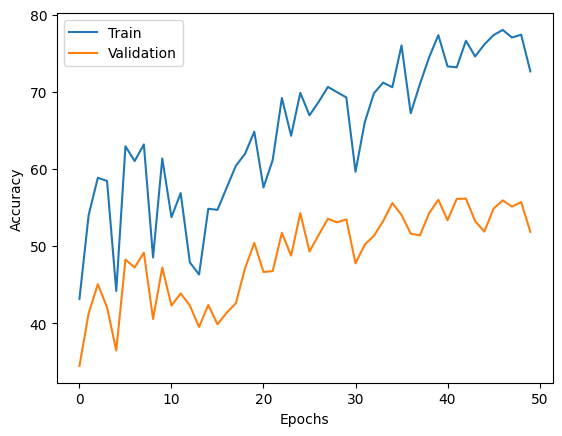

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()